In [5]:
# import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
import statsmodels.api as sm
from pathlib import Path

Import cleaned data

In [6]:
path: str = './data/' #folder where files are stored
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_unique_prot.csv"), dtype=str)   
prokaryotes_all: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_all.csv"), dtype=str)

import Amino acid list

In [7]:

%run ./Aminoacid_lists.py

calculate and append amino acid and property counts onto prokaryotes

In [8]:
from function import rel_aa_comp 
prokaryotes['hydrophobic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_hydrophobic)) # calculates relative amino acid composition of hydrophobic amino acids
prokaryotes['polar_neutral'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_polar_neutral)) # calculates relative amino acid composition of polar neutral amino acids
prokaryotes['acidic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_acidic)) # calculates relative amino acid composition of acidic amino acids
prokaryotes['basic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_basic)) # calculates relative amino acid composition of basic amino acids

for i in range(len(AA_list)):
    prokaryotes[str(AA_list[i])] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, [str(AA_list[i])])) # calculates relative protein abundance


sort dataframe according to meltpoint and auc

In [9]:
prokaryotes_temp_m = prokaryotes.sort_values('meltPoint',ascending = False,na_position="first")
#prokaryotes.rank(axis=0, method: 'first',)

prokaryotes_temp_a = prokaryotes.sort_values('auc',ascending = False,na_position="first")

remove NaN from meltpoint

In [97]:
prokaryotes_temp_NaN = prokaryotes_temp_m.dropna(subset='meltPoint')


select top 10 and bottom 10 percentiles

In [11]:
prokaryote_top_10 = prokaryotes_temp_NaN.iloc[0:944,:]
prokaryote_bottom_10 = prokaryotes_temp_NaN.iloc[8492:9436,:]

prokaryote_top_30 = prokaryotes_temp_NaN.iloc[0:3000,:]
prokaryote_bottom_30 = prokaryotes_temp_NaN.iloc[6500:9436,:]

prokaryote_top_10['meltPoint'] = prokaryote_top_10['meltPoint'].astype(float)
prokaryote_bottom_10['meltPoint'] = prokaryote_bottom_10['meltPoint'].astype(float)

prokaryote_top_10['auc'] = prokaryote_top_10['auc'].astype(float)
prokaryote_bottom_10['auc'] = prokaryote_bottom_10['auc'].astype(float)

prokaryote_top_10['temperature'] = prokaryote_top_10['temperature'].astype(float)
prokaryote_bottom_10['temperature'] = prokaryote_bottom_10['temperature'].astype(float)

prokaryote_top_30['meltPoint'] = prokaryote_top_30['meltPoint'].astype(float)
prokaryote_bottom_30['meltPoint'] = prokaryote_bottom_30['meltPoint'].astype(float)

prokaryote_top_30['auc'] = prokaryote_top_30['auc'].astype(float)
prokaryote_bottom_30['auc'] = prokaryote_bottom_30['auc'].astype(float)

prokaryote_top_30['temperature'] = prokaryote_top_30['temperature'].astype(float)
prokaryote_bottom_30['temperature'] = prokaryote_bottom_30['temperature'].astype(float)

C:\Users\tobia\AppData\Local\Temp\ipykernel_10032\1073663601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryote_top_10['meltPoint'] = prokaryote_top_10['meltPoint'].astype(float)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10032\1073663601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryote_bottom_10['meltPoint'] = prokaryote_bottom_10['meltPoint'].astype(float)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10032\1073663601.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

drop all middle rows
calculate the correlation mtrix and plot it

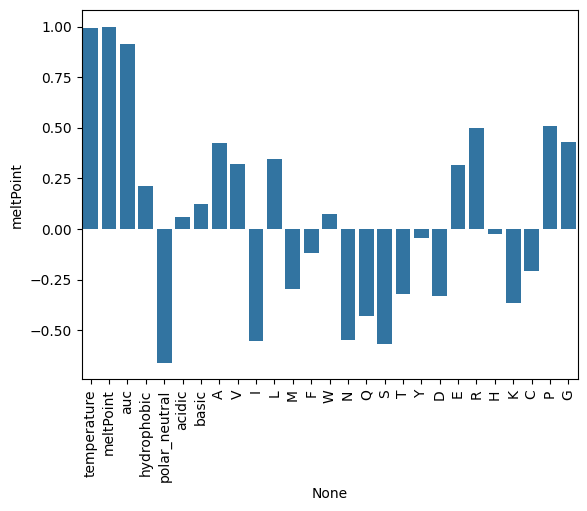

In [12]:
prokaryote_middle = prokaryotes_temp_NaN.drop(prokaryotes_temp_NaN.index[500:9000])

prokaryote_middle['auc'] = prokaryote_middle['auc'].astype(float)
prokaryote_middle['temperature'] = prokaryote_middle['temperature'].astype(float)
prokaryote_middle['meltPoint'] = prokaryote_middle['meltPoint'].astype(float)

prokm_60_corr = prokaryote_middle.corr('pearson', numeric_only=True)

sns.barplot(data= prokm_60_corr, y= 'meltPoint', x = prokm_60_corr.columns)
plt.xticks(rotation = 90)
plt.show()

same same aber mit if Funktion und Quantilen

In [108]:
prokaryotes_temp_NaN['meltPoint'] = prokaryotes_temp_NaN['meltPoint'].astype(float)
prokaryotes_temp_NaN['temperature'] = prokaryotes_temp_NaN['temperature'].astype(float)
prokaryotes_temp_NaN['auc'] = prokaryotes_temp_NaN['auc'].astype(float)

quantiles = prokaryotes_temp_NaN['meltPoint'].quantile(q=[0.5, 0.5])
quantiles = quantiles.astype('float64')
quantiles = list(quantiles)

pain = []
quantiles_prokaryotes_temp_NaN = pd.DataFrame()
quantiles_prokaryotes_temp_NaN = pd.DataFrame()
for n in range(len(prokaryotes_temp_NaN)):
    if prokaryotes_temp_NaN.iloc[n,15] < quantiles[0] or prokaryotes_temp_NaN.iloc[n, 15] > quantiles[1]:
        pain.append(n)
        print(n)
quantiles_prokaryotes_temp_NaN = prokaryotes_temp_NaN.iloc[pain,:]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/501996581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryotes_temp_NaN['meltPoint'] = prokaryotes_temp_NaN['meltPoint'].astype(float)
/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/501996581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryotes_temp_NaN['temperature'] = prokaryotes_temp_NaN['temperature'].astype(float)
/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/501996581.py:3: Setti

use quantiles to caclulate and plot correlation

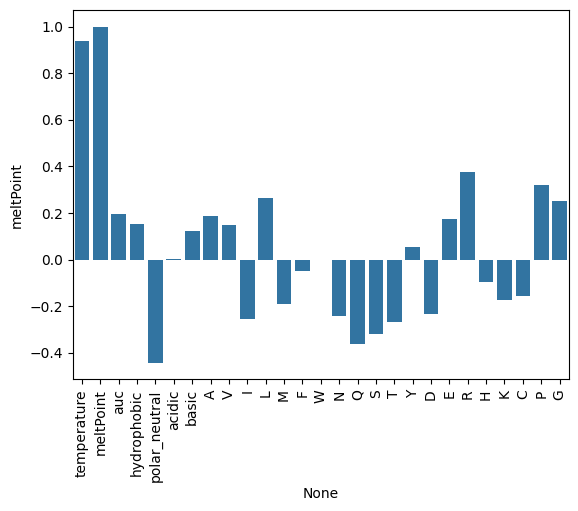

In [109]:

prokq_corr = quantiles_prokaryotes_temp_NaN.corr('pearson', numeric_only=True)

sns.barplot(data= prokq_corr, y= 'meltPoint', x = prokq_corr.columns)
plt.xticks(rotation = 90)
plt.show()

calculate correlation of amino acid content between top 10 and bottow 10 meltpoins

In [ ]:

prokt_10_corr = prokaryote_top_10.corr('pearson', numeric_only=True)
prokb_10_corr = prokaryote_bottom_10.corr('pearson', numeric_only=True)

prokt_30_corr = prokaryote_top_30.corr('pearson', numeric_only=True)
prokb_30_corr = prokaryote_bottom_30.corr('pearson', numeric_only=True)


plotting the correlation

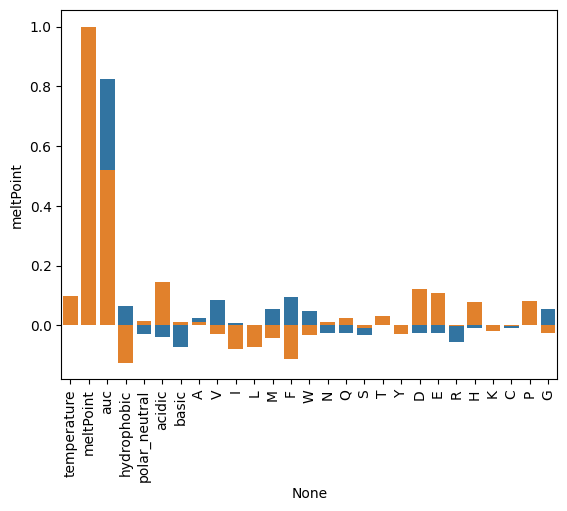

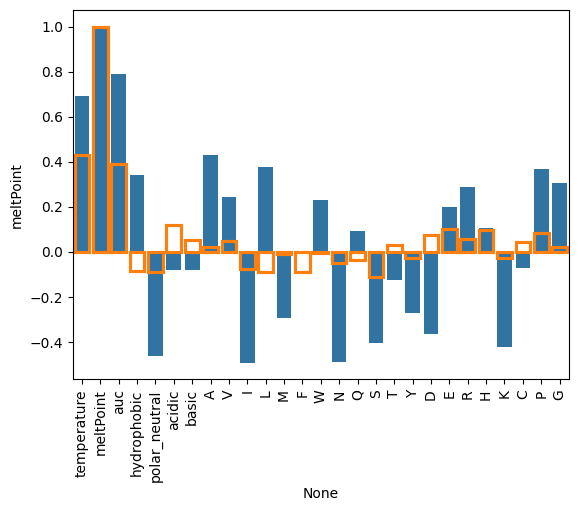

In [ ]:
sns.barplot(data= prokt_10_corr, y= 'meltPoint', x = prokt_10_corr.columns)
sns.barplot(data= prokb_10_corr, y= 'meltPoint', x = prokt_10_corr.columns)
plt.xticks(rotation = 90)
plt.show()

sns.barplot(data= prokt_30_corr, y= 'meltPoint', x = prokt_30_corr.columns)
sns.barplot(data= prokb_30_corr, y= 'meltPoint', x = prokb_30_corr.columns, fill=False)
plt.xticks(rotation = 90)
plt.show()